In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import minmax_scale

#from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Read diabetices data and load it in Pandas DataFrame

In [3]:
data = pd.read_csv('diabetes.csv')
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Checking outliers

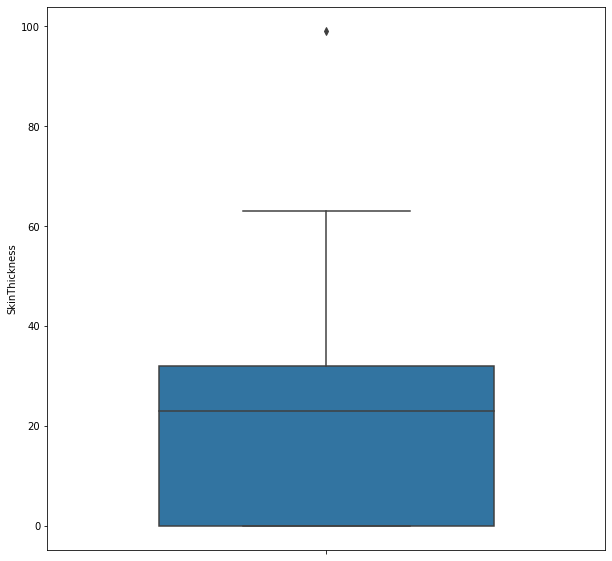

In [5]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data, y='SkinThickness', width=0.6, orient='v')

In [6]:
data = data[data['SkinThickness']<70]

In [7]:
y = data.iloc[:,-1]
x = data.iloc[:,:-1]

In [8]:
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.847458,120.795306,69.104302,20.434159,79.903520,31.989048,0.471742,33.203390
std,3.371117,31.874936,19.368410,15.708524,115.283105,7.888698,0.331524,11.721879
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


## Fill zeros with NaN values

In [9]:
for col in x.columns:
    if col != 'Pregnancies':
        x[col] = x[col].replace({0:np.nan})

In [10]:
# checking missing values count
missing = pd.DataFrame({
    'name': x.columns,
    'count': x.isnull().sum(),
    'percentage': x.isnull().sum()/x.shape[0]*100
})
missing.sort_values(by='percentage', ascending=False)

,name,count,percentage
Insulin,Insulin,373,48.631030
SkinThickness,SkinThickness,227,29.595828
BloodPressure,BloodPressure,35,4.563233
BMI,BMI,11,1.434159
Glucose,Glucose,5,0.651890
Pregnancies,Pregnancies,0,0.000000
DiabetesPedigreeFunction,DiabetesPedigreeFunction,0,0.000000
Age,Age,0,0.000000


## Train Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 613 entries, 60 to 102
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               613 non-null    int64  
 1   Glucose                   608 non-null    float64
 2   BloodPressure             589 non-null    float64
 3   SkinThickness             432 non-null    float64
 4   Insulin                   322 non-null    float64
 5   BMI                       606 non-null    float64
 6   DiabetesPedigreeFunction  613 non-null    float64
 7   Age                       613 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 43.1 KB


In [13]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,613.000000,608.000000,589.000000,432.000000,322.000000,606.000000,613.000000,613.000000
mean,3.769984,122.373355,72.390492,28.877315,154.242236,32.303960,0.467697,33.110930
std,3.299477,30.542385,12.514902,9.891347,120.514539,6.927804,0.331923,11.593782
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,100.000000,64.000000,21.000000,77.000000,27.400000,0.240000,24.000000
50%,3.000000,118.000000,72.000000,29.000000,120.000000,32.000000,0.366000,29.000000
75%,6.000000,141.000000,80.000000,36.000000,184.750000,36.300000,0.626000,40.000000
max,17.000000,198.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


## Fill missing values of continuous variable

In [14]:
for col in X_train.columns:
    X_train[col] = X_train[col].fillna(X_train[col].mean()).astype('float64')
    X_test[col] = X_test[col].fillna(X_train[col].mean()).astype('float64')

In [15]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 668 to 721
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               154 non-null    float64
 1   Glucose                   154 non-null    float64
 2   BloodPressure             154 non-null    float64
 3   SkinThickness             154 non-null    float64
 4   Insulin                   154 non-null    float64
 5   BMI                       154 non-null    float64
 6   DiabetesPedigreeFunction  154 non-null    float64
 7   Age                       154 non-null    float64
dtypes: float64(8)
memory usage: 10.8 KB


# LogisticRegression Model

In [17]:
Logi_Reg_Model = LogisticRegression()

In [18]:
Logi_Reg_Model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
y_predict = Logi_Reg_Model.predict(X_test)

In [43]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [20]:
Logi_Reg_Model.score(X_train, y_train)

0.7585644371941273

In [21]:
Logi_Reg_Model.score(X_test, y_test)

0.8246753246753247

In [22]:
y_predict_pa = Logi_Reg_Model.predict_proba(X_test)[::,1]

In [23]:
result_df = pd.DataFrame({
    'ytest': y_test,
    'yPredict': y_predict
})

In [25]:
result_df

,ytest,yPredict
668,0,0
324,0,0
624,0,0
690,0,0
521,0,0
...,...,...
355,1,1
533,0,0
344,0,0
296,1,0


# Performance of LogisticRegression model by Confusion Matrix

In [26]:
confusionMatrix = confusion_matrix(y_test, y_predict)
confusionMatrix

array([[95,  9],
       [18, 32]], dtype=int64)

# Check Model Performance 

In [27]:
precision_score(y_test, y_predict)

0.7804878048780488

In [28]:
recall_score(y_test, y_predict)

0.64

In [29]:
f1_score(y_test, y_predict)

0.7032967032967035

In [30]:
auc = round(roc_auc_score(y_test, y_predict_pa), ndigits=8)

In [31]:
fpr, tpr, thrshould = roc_curve(y_test, y_predict_pa)

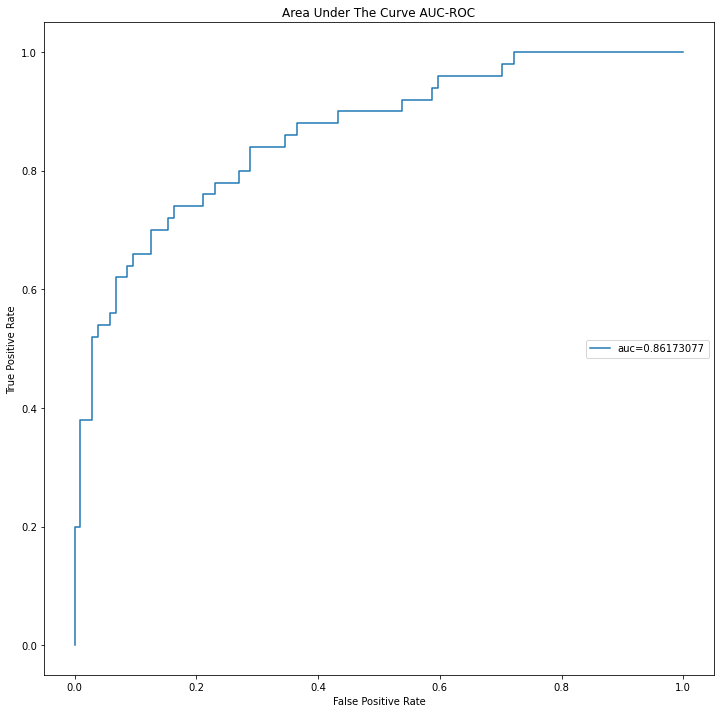

In [32]:
plt.figure(figsize=(12,12))
plt.plot(fpr, tpr, label="auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under The Curve AUC-ROC')

plt.legend(loc= 7)
plt.show()

In [35]:
#!pip list

In [34]:
import joblib

In [36]:
model_Diabetes = 'diabetesML.pkl'

In [37]:
with open(model_Diabetes, 'wb') as file:
    joblib.dump(Logi_Reg_Model, file)

In [40]:
model = joblib.load(filename='diabetesML.pkl')

In [42]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)